# UK Data Analysis Exercise

###### <b>

## Questions: 
##### - What Speed Limit Causes the Most Accidents 
##### - What is the Most Dangerous Time to Drive?
##### - What Year, Month Has the Highest Amount of Accidents?
##### - What Days of the week has more serious accidents?
##### - What Road and Light Conditions influence accidents?
##### - Are Fatal Accidents more common in Rural or Urban Areas?

#### <b>

### Import Modules

In [1]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

sns.set(style='darkgrid')
sns.set_palette('colorblind')

### Convert Excel to CSV reduce workload

In [ ]:
#ukdata = pd.read_excel(r'/Users/danhosanee/Downloads/Dataset.xlsx')

In [ ]:
#ukdata.to_csv('ukdata.csv', encoding='utf-8', index=False)

### Set Directory for Dict Folder

In [2]:
#Set current dir to dic data folder
os.chdir('/Users/danhosanee/Downloads/contextCSVs (accidents)')

In [3]:
ukData = pd.read_csv('ukdata.csv')

### Check the Data

In [4]:
ukData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570609 entries, 0 to 570608
Data columns (total 28 columns):
ID                                             570609 non-null int64
Location_Easting_OSGR                          570582 non-null float64
Location_Northing_OSGR                         570582 non-null float64
Longitude                                      570582 non-null float64
Latitude                                       570582 non-null float64
Police_Force                                   570609 non-null int64
Accident_Severity                              570609 non-null int64
Number_of_Vehicles                             570609 non-null int64
Number_of_Casualties                           570609 non-null int64
Date                                           570609 non-null object
Day_of_Week                                    570609 non-null int64
Time                                           570578 non-null object
Local_Authority_(District)                     5706

### Add Data Dictionary for Accident Severity to the DF

In [5]:
#Severity of Accident Caterogies
accsev_dic = pd.read_csv('Accident_Severity.csv')

#Merge accsev to UkData
ukData = ukData.merge(accsev_dic , how ='left', left_on=['Accident_Severity'], right_on=['code'])

#Rename label Column 
ukData = ukData.rename(columns={'label':'Accident_Severity_Label'})

#Test
ukData.sample(5)

,ID,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,code,Accident_Severity_Label
413260,413261,426110.0,135284.0,-1.628369,51.116197,54,3,2,1,2014-07-01,...,-1,0,0,0,1,2,1,E01032041,3,Slight
306627,306628,510120.0,187110.0,-0.412420,51.572063,1,3,1,1,2014-02-24,...,6,0,0,1,1,1,1,E01002470,3,Slight
493072,493073,378038.0,352552.0,-2.329223,53.069748,21,3,3,3,2015-05-14,...,-1,0,0,0,1,2,2,E01029532,3,Slight
336920,336921,458712.0,404073.0,-1.115730,53.530034,14,3,2,2,2014-06-20,...,6,0,0,0,1,1,1,E01007646,3,Slight
368301,368302,519920.0,302220.0,-0.230617,52.604507,35,3,2,2,2014-09-08,...,3,15,0,0,1,2,1,E01015657,3,Slight


## Speed Limit
#### What Speed Limit Causes the Most Accidents? 
###### - Highest No. Accidents occur at 30 Speed Limit 
###### - Highest Serious and Slight accidents occur at 30 Speed Limit
###### - Highest Fatal Accidents occur at roads with a 60 Speed Limit
###### <b>

In [16]:
#Create a Grouped DF comparing Speed Limit against Accident_Severity_Label
speed_gp = (ukData.groupby(['Accident_Severity_Label','Speed_limit'])['Accident_Severity_Label']
            .agg('count').unstack('Accident_Severity_Label').fillna(0))

#Highlight Max Values
speed_gp.style.highlight_max(color='red')

Accident_Severity_Label,Fatal,Serious,Slight
Speed_limit,,,
0,0,0,1
10,0,0,3
20,55,1890,10674
30,2214,47701,319183
40,636,7071,39518
50,448,3459,18075
60,2361,16193,61705
70,805,4925,33692


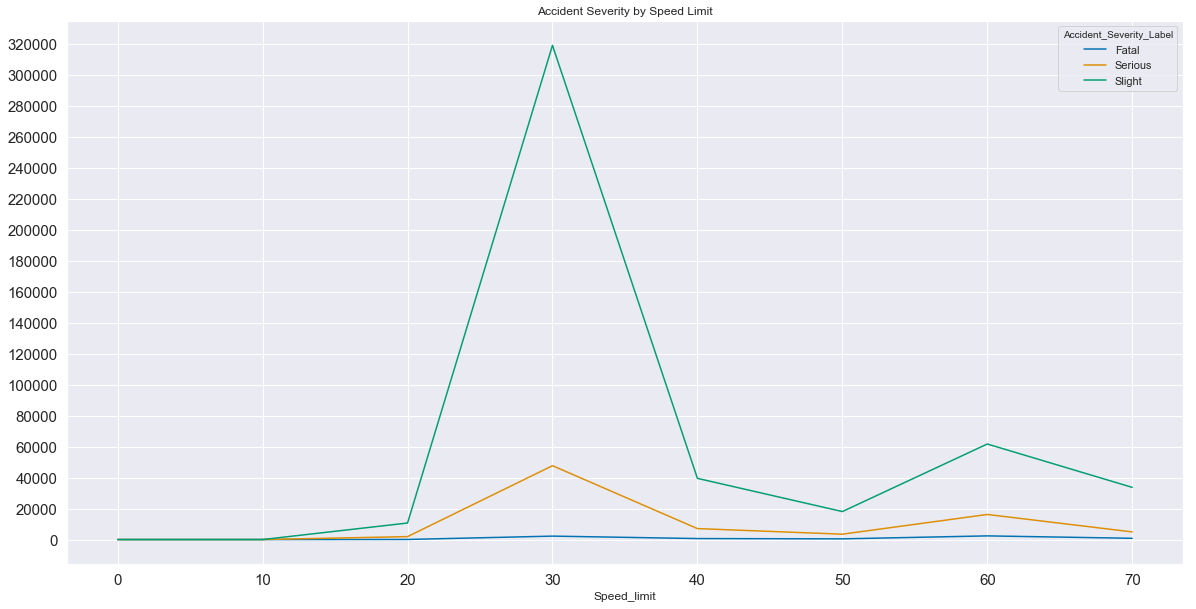

In [127]:
#Plot Grouped Data Speed by ASL
speed_gp.plot(kind='line', title='Accident Severity by Speed Limit',
              figsize=(20,10), fontsize=15, sort_columns=True,
              yticks=range(0,330000,20000))

#### Seasonality: By Year, Weekday, Time of Day | Transform Data to relevant time periods


In [17]:
#Seasonality, Dict Data
dotw_dic = pd.read_csv('Day_of_Week.csv')

#Convert Date Object to Datetime 
ukData['Date'] = pd.to_datetime(ukData['Date'], format='%Y-%m-%d')
ukData['Time'] = pd.to_datetime(ukData['Time'], format='%H:%M:%S')

#Get the Year only from Date column
ukData['Year'] = ukData.Date.dt.year

#Get the Month only from Month Column
ukData['Month'] = ukData.Date.dt.strftime('%b')

#Get the Time in Hour by hours column covert to Int
ukData['Hour'] = ukData.Time.dt.hour.fillna(0).astype(int)

#Create an instance with the relevant columns to Analyse different seasonal Data
season = ukData[['ID','Date', 'Year', 'Month','Day_of_Week','Hour','Accident_Severity_Label']]

In [18]:
#Merge The Dictionary file with the Season Dataframe
season = (season.merge(dotw_dic, how ='left', left_on=['Day_of_Week'], right_on=['code'])
          .reindex(columns=['ID','Date', 'Year', 'Month','Day_of_Week','label','Hour','Accident_Severity_Label']))

season.sample(5)

,ID,Date,Year,Month,Day_of_Week,label,Hour,Accident_Severity_Label
363147,363148,2014-05-22,2014,May,5,Thursday,10,Slight
372353,372354,2014-10-19,2014,Oct,1,Sunday,9,Slight
173726,173727,2013-03-06,2013,Mar,4,Wednesday,7,Serious
321032,321033,2014-03-30,2014,Mar,1,Sunday,11,Slight
7341,7342,2012-03-20,2012,Mar,3,Tuesday,14,Slight


In [20]:
#rename label column to Day
season =  season.rename(columns={"label":"Day"})
#Test
season.sample(3)

,ID,Date,Year,Month,Day_of_Week,Day,Hour,Accident_Severity_Label
530760,530761,2015-08-17,2015,Aug,2,Monday,14,Slight
329966,329967,2014-04-10,2014,Apr,5,Thursday,22,Slight
529250,529251,2015-04-14,2015,Apr,3,Tuesday,18,Slight


## Time
#### What is the Most Dangerous Time to Drive?
###### - 5pm is the Most dangerous time to Drive during the Day
###### - The two peaks in no. of Accidents occur at 8am and 5pm 

In [122]:
#Group Data ASL against Hours
seasongrphr = (season.groupby(['Accident_Severity_Label','Hour'])['Accident_Severity_Label']
               .count().unstack('Accident_Severity_Label'))
#View
seasongrphr.style.highlight_max(color='red')

Accident_Severity_Label,Fatal,Serious,Slight
Hour,,,
0,208,1500,6272
1,160,1125,4485
2,141,947,3468
3,133,820,2883
4,111,607,2455
5,148,940,3894
6,175,1763,8918
7,255,3482,21813
8,229,4783,37003


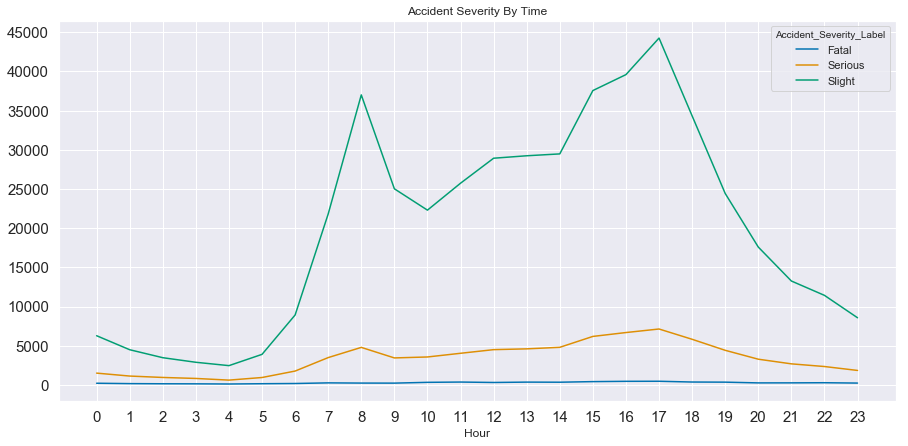

In [26]:
#Plot ASL by Time
seasongrphr.plot(kind='line',figsize=(15,7),xticks=range(0,24),yticks=range(0,50000,5000),
                 title='Accident Severity By Time',fontsize=15)

## By Year
####  What Year Has the Highest Amount of Accidents?
###### - 2014 had the Most Accidents between 2012-2015
###### - 2013 had the Least Accidents between 2012-2015

In [125]:
#Group Data ASL against Year
seasongrpyear = (season.groupby(['Accident_Severity_Label','Year'])['ID'].agg('count')
                 .unstack('Accident_Severity_Label'))

#Highlight Max Values
seasongrpyear.style.highlight_max(color='yellow').highlight_min(color='lightgreen')

Accident_Severity_Label,Fatal,Serious,Slight
Year,,,
2012,1637,20901,123033
2013,1608,19624,117428
2014,1658,20676,123988
2015,1616,20038,118402


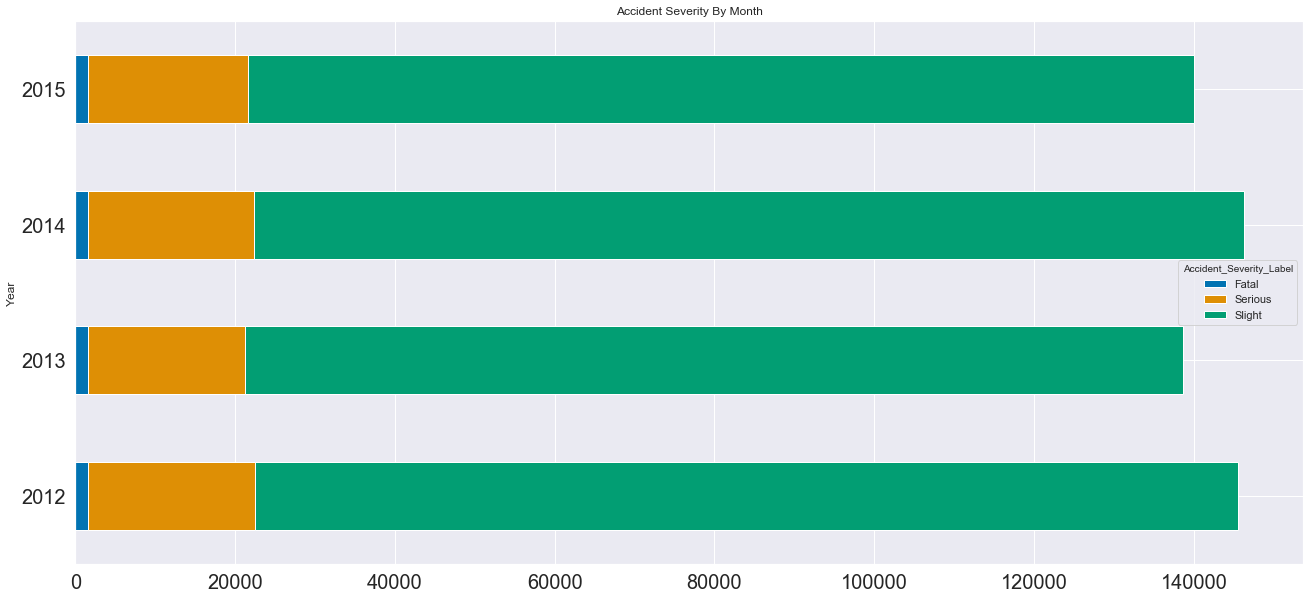

In [34]:
#Plot Data
seasongrpyear.plot(kind='barh',stacked=True, figsize= (22,10)
                   ,fontsize=20,title='Accident Severity By Month',
                   sharey=True)

## Per Month
#### What Months has the Highest no. of Accidents?
###### - Jul, Oct & Nov are the Months most accidents occur
###### - Highest No. of Fatal Accidents were in Dec
###### - Highest No. of Serious Accidents were in Jul
###### - Highest No. of Slight Accidents were in Oct

In [134]:
#Group ASL by Month
seasongrpmonth = (season.groupby(['Accident_Severity_Label','Month'])['ID'].agg('count')
                                  .unstack('Accident_Severity_Label')
                                  .reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']))
#Highlight Max Values
seasongrpmonth.style.highlight_max(color='yellow')

Accident_Severity_Label,Fatal,Serious,Slight
Month,,,
Jan,505,6065,39179
Feb,433,5622,35593
Mar,488,6295,38526
Apr,501,6070,36093
May,550,7141,39941
Jun,530,7028,40345
Jul,583,7603,43441
Aug,570,7129,39531
Sep,564,7229,41318


In [52]:
#Group ASL and Month & Normalize by ASL
((pd.crosstab(season['Month'],season['Accident_Severity_Label'],normalize='columns')*100)
    .reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).style.format('{0:,.0f}%')
    .highlight_max(color='yellow'))

Accident_Severity_Label,Fatal,Serious,Slight
Month,,,
Jan,8%,7%,8%
Feb,7%,7%,7%
Mar,7%,8%,8%
Apr,8%,7%,7%
May,8%,9%,8%
Jun,8%,9%,8%
Jul,9%,9%,9%
Aug,9%,9%,8%
Sep,9%,9%,9%


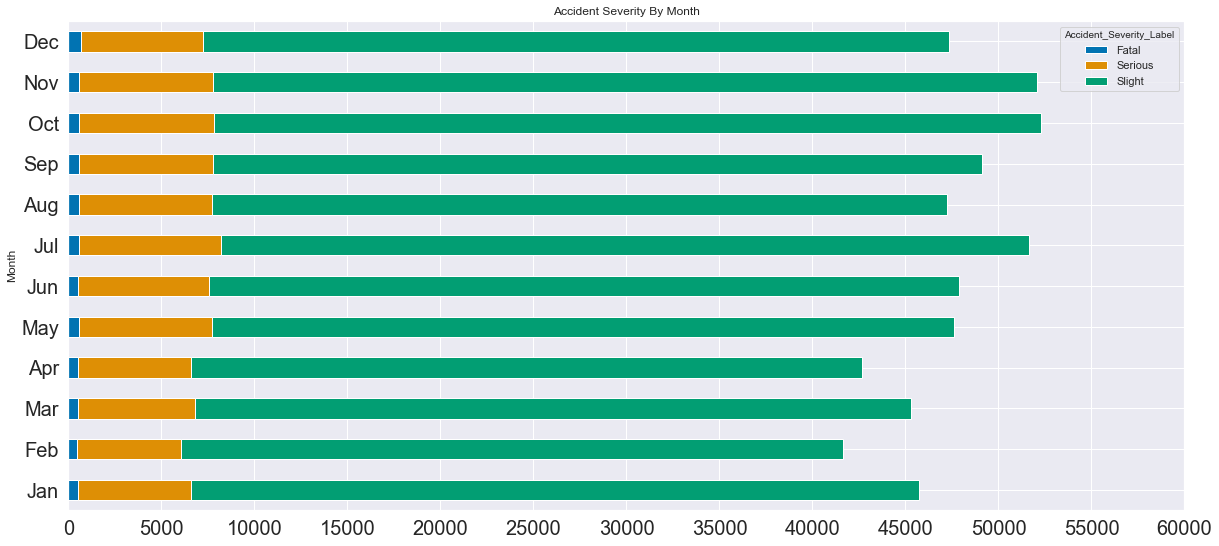

In [36]:
#Plot ASL by Month by Count
seasongrpmonth.plot(kind='barh',stacked=True, figsize= (20,9),fontsize=20,
                    title='Accident Severity By Month',xticks=(range(0,65000,5000)))

### Per Day
#### What days of the week has more serious accidents?
###### - Highest volume of fatal accidents have occurred between Friday to Sunday, with the worst date being Saturday
###### - Friday has the highest no. of accidents

In [57]:
#Group ASL by Day
seasongrpday = (season.groupby(['Accident_Severity_Label','Day'])['Accident_Severity_Label'].agg('count')
                .unstack('Accident_Severity_Label').reindex(['Sunday','Monday','Tuesday','Wednesday',
                                                                  'Thursday','Friday','Saturday']))
#Highlight Max Values
seasongrpday.style.highlight_max(color='yellow')

Accident_Severity_Label,Fatal,Serious,Slight
Day,,,
Sunday,1041,10322,50545
Monday,848,11057,69961
Tuesday,853,11750,74064
Wednesday,823,11685,73528
Thursday,859,11862,74058
Friday,993,12950,78946
Saturday,1102,11613,61749


In [64]:
#Group Day by ASL then Normalize, Covert to % and Highlight Max % values
seasongrpdayPer=((pd.crosstab(season['Day'],season['Accident_Severity_Label'],normalize='columns')
     .reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])*100)
     .style.format('{0:,.0f}%')
     .highlight_max(color='yellow'))

seasongrpdayPer

Accident_Severity_Label,Fatal,Serious,Slight
Day,,,
Sunday,16%,13%,10%
Monday,13%,14%,14%
Tuesday,13%,14%,15%
Wednesday,13%,14%,15%
Thursday,13%,15%,15%
Friday,15%,16%,16%
Saturday,17%,14%,13%


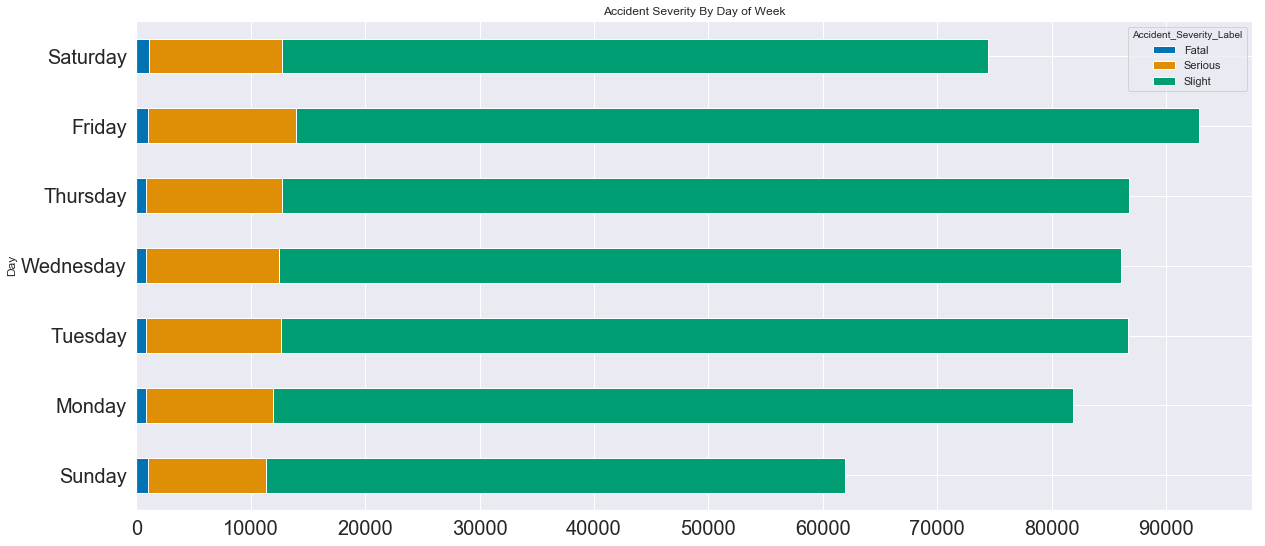

In [136]:
#Plot ASL by DOFTW by Count
seasongrpday.plot(kind='barh',stacked=True, figsize= (20,9),fontsize=20,
                    title='Accident Severity By Day of Week',use_index=True,xticks=range(0,95000,10000))

## External Factors
#### What Road Types and Light Conditions influnce accidents?
###### - Single Carriageway Roads in  Daylight and Lights Lit conditions has the highest no. of accidents
###### - Single & Dual Carriageways and Roundabouts in Daylight or Lit conditions are the Top 3 in terms of accidents 
###### - Carriageways/Roundabout Road Types have a major influnce in no. of accidents


In [66]:
#External Factors Dict's Import
road_dic = pd.read_csv('Road_Type.csv')
light_dic = pd.read_csv('Light_Conditions.csv')

In [67]:
#Create an instance of the ukData and assign to ext_fac to reduce columns
ext_fac = ukData[['ID','Light_Conditions','Road_Type','Accident_Severity_Label']]
ext_fac.sample(5)

,ID,Light_Conditions,Road_Type,Accident_Severity_Label
147951,147952,4,6,Slight
109760,109761,1,6,Slight
520552,520553,1,6,Slight
310483,310484,1,6,Slight
62202,62203,1,6,Serious


In [68]:
#Merge Data with Road_Type Dic File
ext_fac = (ext_fac.merge(road_dic, how ='left', left_on=['Road_Type'], right_on=['code']))
ext_fac = ext_fac.rename(columns={'label':'Road'})
ext_fac.head()

,ID,Light_Conditions,Road_Type,Accident_Severity_Label,code,Road
0,1,4,6,Slight,6,Single carriageway
1,2,4,6,Slight,6,Single carriageway
2,3,1,2,Slight,2,One way street
3,4,1,6,Slight,6,Single carriageway
4,5,4,6,Slight,6,Single carriageway


In [69]:
#Merge Data with Light Conditions
ext_fac = (ext_fac.merge(light_dic, how='left', left_on=['Light_Conditions'], right_on=['code']))
ext_fac = ext_fac.rename(columns={'label':'Light'})
ext_fac.head()

,ID,Light_Conditions,Road_Type,Accident_Severity_Label,code_x,Road,code_y,Light
0,1,4,6,Slight,6,Single carriageway,4,Darkness - lights lit
1,2,4,6,Slight,6,Single carriageway,4,Darkness - lights lit
2,3,1,2,Slight,2,One way street,1,Daylight
3,4,1,6,Slight,6,Single carriageway,1,Daylight
4,5,4,6,Slight,6,Single carriageway,4,Darkness - lights lit


##### View the Dic Data for Road and Light Factors

In [70]:
#Create Instance with Columns being used for Groupby
ext_fac_fin = ext_fac.reindex(columns=['ID','Accident_Severity_Label','Road','Light'])
#Test
ext_fac_fin.head()

,ID,Accident_Severity_Label,Road,Light
0,1,Slight,Single carriageway,Darkness - lights lit
1,2,Slight,Single carriageway,Darkness - lights lit
2,3,Slight,One way street,Daylight
3,4,Slight,Single carriageway,Daylight
4,5,Slight,Single carriageway,Darkness - lights lit


In [71]:
#Group Road, Light against ASL
ext_fac_plt = pd.crosstab([ext_fac_fin['Road'],ext_fac_fin['Light']],ext_fac_fin['Accident_Severity_Label'],
                          margins=True, margins_name='Total')
ext_fac_plt.head()

Accident_Severity_Label                       Fatal  Serious  Slight  Total
Road             Light                                                     
Dual carriageway Darkness - lighting unknown     24      122     992   1138
                 Darkness - lights lit          274     2244   13623  16141
                 Darkness - lights unlit         17       83     469    569
                 Darkness - no lighting         305      993    4727   6025
                 Daylight                       638     6675   50226  57539

Text(0.5,1,'Accident Severity By External Factors')

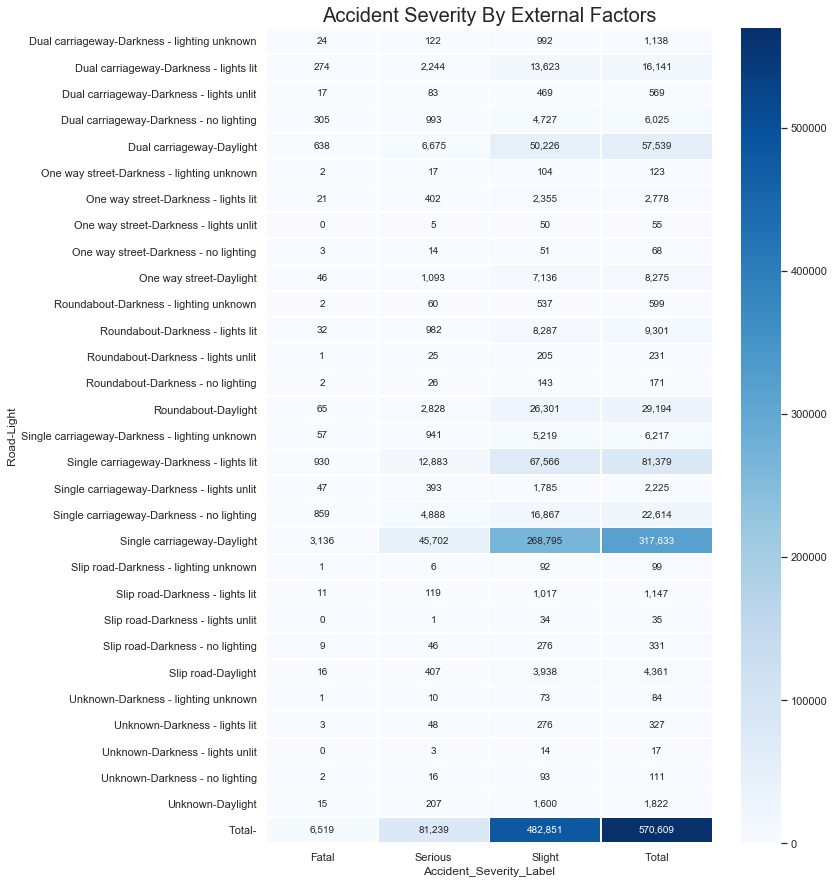

In [72]:
#Plot a HeatMap of Road,Light and ASL
f, ax = plt.subplots(figsize=(10, 15))
sns.heatmap(ext_fac_plt,cmap='Blues', annot=True, cbar=True, fmt='0,g', ax=ax, linewidths=0.5,vmax=570000) 
ax.set_title('Accident Severity By External Factors', loc='center',fontsize=20)

## Geographic
#### Are Fatal Accidents more common in Rural or Urban Areas?
##### - Fatal Accidents have occurred more in Rural than Urban Areas
##### - 64% of fatal accidents have occurred in Rural Areas

In [90]:
#Geography Dictionary assign to a variable
urban_rural_dic = pd.read_csv('Urban_Rural.csv')
urban_rural_dic.head(3)

,code,label
0,1,Urban
1,2,Rural
2,3,Unallocated


In [91]:
#Create an instance of ukData 
geo_area = ukData[['ID','Urban_or_Rural_Area','Accident_Severity_Label']]
#Test
geo_area.sample(5)

,ID,Urban_or_Rural_Area,Accident_Severity_Label
75698,75699,2,Slight
539890,539891,1,Slight
422949,422950,1,Slight
277780,277781,2,Slight
155127,155128,1,Serious


In [92]:
#Merge Data to Dic Values
geo_area = geo_area.merge(urban_rural_dic,how='left',left_on=['Urban_or_Rural_Area'], right_on=['code'])
#Test
geo_area.sample(5)

,ID,Urban_or_Rural_Area,Accident_Severity_Label,code,label
255562,255563,2,Serious,2,Rural
280090,280091,1,Slight,1,Urban
166924,166925,1,Slight,1,Urban
359531,359532,1,Slight,1,Urban
243003,243004,1,Slight,1,Urban


In [94]:
#Rename Label as Geography
geo_area = (geo_area.rename(columns={'label':'Geography'})
            .reindex(columns=['ID','Accident_Severity_Label','Geography']))

In [95]:
#Group ASL by Geography
geo_area_plt = pd.crosstab(geo_area['Geography'],geo_area['Accident_Severity_Label'],margins=True)
geo_area_plt.style.format(highlight)

Accident_Severity_Label,Fatal,Serious,Slight,All
Geography,,,,
Rural,4165,33546,159177,196888
Urban,2354,47693,323674,373721
All,6519,81239,482851,570609


In [113]:
#group ASL by Geo in % Terms based on ASL eg. 64% of fatal accidents are in rural areas
geo_area_plt_per = pd.crosstab(geo_area['Geography'],geo_area['Accident_Severity_Label'],normalize='columns')

#group ASL by Geo via Count
geo_area_plt = pd.crosstab(geo_area['Geography'],geo_area['Accident_Severity_Label'])


In [114]:
#View by Count
geo_area_plt.style.highlight_max(color='yellow')

Accident_Severity_Label,Fatal,Serious,Slight
Geography,,,
Rural,4165,33546,159177
Urban,2354,47693,323674


In [115]:
#ASL by Geo in % Terms based on ASL eg. 64% of fatal accidents are in rural areas
(geo_area_plt_per*100).style.format('{0:,.0f}%').highlight_max(color='yellow')

Accident_Severity_Label,Fatal,Serious,Slight
Geography,,,
Rural,64%,41%,33%
Urban,36%,59%,67%


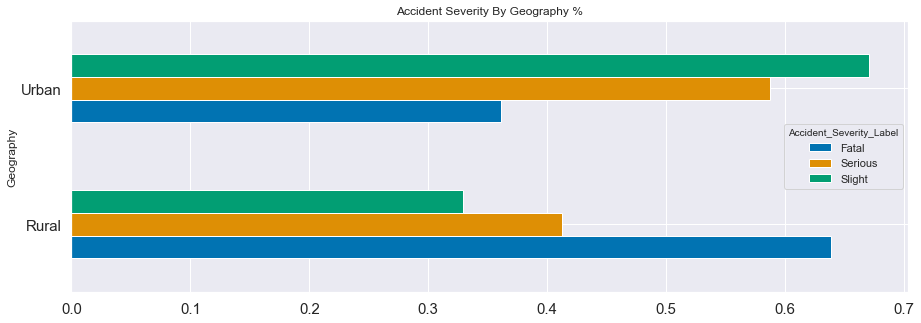

In [120]:
#ASL by Geo in % Terms based on ASL eg. 64% of fatal accidents are in rural areas - Plot
geo_area_plt_per.plot(kind='barh',stacked=False, figsize= (15,5),fontsize=15,
                    title='Accident Severity By Geography %',use_index=True)

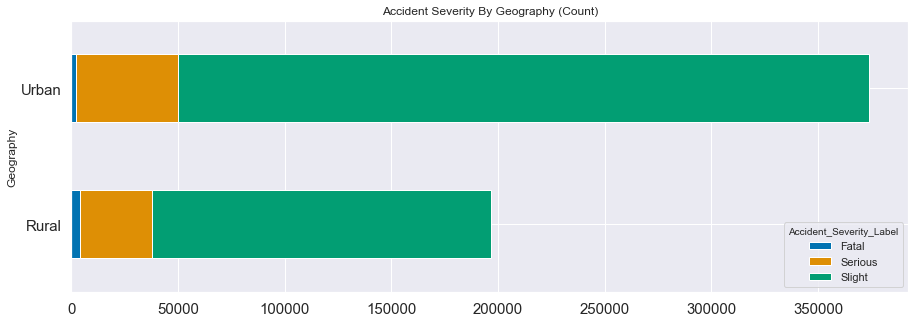

In [133]:
#ASL by Geo via Count
geo_area_plt.plot(kind='barh',stacked=True, figsize= (15,5),fontsize=15,
                    title='Accident Severity By Geography (Count)',use_index=True)